## Clear messages

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 23.9MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
import os
import pandas as pd
import numpy as np
import json
import hashlib
from tqdm.notebook import tqdm
import random
import difflib
from itertools import chain
from string import punctuation

In [5]:
objects = []

In [6]:
for file in os.listdir('data'):
    hits = []
    with open('data/'+ file) as json_file:
        obj = json.load(json_file)
        hits = obj['hits']['hits']
        objects.extend(list(map(lambda hit: {'timestamp': hit['_source']['@timestamp'], 'message': hit['_source']['message']}, hits)))

In [7]:
df = pd.DataFrame.from_records(objects)

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Tokenized pattern

In [9]:
df['Tokenized Pattern'] = df['message'].str.replace(r' ', '*_*').str.split('*')
df

,timestamp,message,Tokenized Pattern
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2..."
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2..."
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2..."
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2..."
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2..."
...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC..."
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f..."
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC..."
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f..."


### Cleaned

In [10]:
df['Cleaned'] = df['message'].str.replace(r'\S+\.\S+', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata (0), SYS, INFO, 0, , Manager (SY..."
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata (0), SYS, INFO, 0, , Manager (SY..."
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata (0), SYS, INFO, 0, , Manager (SY..."
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata (0), SYS, INFO, 0, , Manager (SY..."
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata (0), SYS, INFO, 0, , Manager (SY..."
...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",] -y DbDir\nRaima Database Manager [Buil...
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",] Copy from to
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",] -y DbDir\nRaima Database Manager [Buil...
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",] Copy from to


In [11]:
df['Cleaned'] = df['Cleaned'].str.replace(r'([a-zA-Z_.|:;-]*\d+[a-zA-Z_.|:;-]*)+', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata ( ), SYS, INFO, , , Manager (SY..."
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata ( ), SYS, INFO, , , Manager (SY..."
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata ( ), SYS, INFO, , , Manager (SY..."
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata ( ), SYS, INFO, , , Manager (SY..."
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...","WCCILdata ( ), SYS, INFO, , , Manager (SY..."
...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",] -y DbDir\nRaima Database Manager [Buil...
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",] Copy from to
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",] -y DbDir\nRaima Database Manager [Buil...
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",] Copy from to


In [12]:
df['Cleaned'] = df['Cleaned'].str.replace(r'[^\w ]', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SY...
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SY...
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SY...
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SY...
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SY...
...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build...
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build...
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to


In [13]:
df['Cleaned'] = df['Cleaned'].str.replace(r' +', r' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...
...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to


In [14]:
df['Sequence'] = df['Cleaned'].str.lower().str.split()
df

,timestamp,message,Tokenized Pattern,Cleaned,Sequence
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu..."
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu..."
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu..."
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu..."
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu..."
...,...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...,"[y, dbdir, raima, database, manager, build, da..."
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to,"[copy, from, to]"
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...,"[y, dbdir, raima, database, manager, build, da..."
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to,"[copy, from, to]"


### Hash

In [15]:
df['Hash'] = df['Cleaned'].str.lower().str.encode('utf-8').apply(lambda x: hashlib.md5(x).hexdigest())
df

,timestamp,message,Tokenized Pattern,Cleaned,Sequence,Hash
0,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu...",2fdfc571d6fc2b5cbef0955c70ffe95a
1,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu...",2fdfc571d6fc2b5cbef0955c70ffe95a
2,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu...",2fdfc571d6fc2b5cbef0955c70ffe95a
3,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu...",2fdfc571d6fc2b5cbef0955c70ffe95a
4,2017-01-30 16:48:25.055000+00:00,"WCCILdata (0), 2017.01.30 17:48:25.055, SYS, I...","[WCCILdata, _, (0),, _, 2017.01.30, _, 17:48:2...",WCCILdata SYS INFO Manager SYS Event num CONN ...,"[wccildata, sys, info, manager, sys, event, nu...",2fdfc571d6fc2b5cbef0955c70ffe95a
...,...,...,...,...,...,...
99995,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...,"[y, dbdir, raima, database, manager, build, da...",841edf1830bfaf536558ea1b897c9bcc
99996,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to,"[copy, from, to]",7993794f8a4bad65bdec5723a00567dc
99997,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] /opt/WinCC_OA/3.15/...,"[[2017.01.30;17:48:24:841, _, ], _, /opt/WinCC...",y DbDir Raima Database Manager Build Database...,"[y, dbdir, raima, database, manager, build, da...",841edf1830bfaf536558ea1b897c9bcc
99998,2017-01-30 16:48:24.841000+00:00,[2017.01.30;17:48:24:841 ] Copy from /opt/WinC...,"[[2017.01.30;17:48:24:841, _, ], _, Copy, _, f...",Copy from to,"[copy, from, to]",7993794f8a4bad65bdec5723a00567dc


### Regouping

In [16]:
def levenshtein_similarity(a, b):
    return 1 - editdistance.eval(a, b) / max(len(a), len(b))

In [17]:
def levenshtein_similarity_1_to_n(many, single = None):
    if len(many) == 0:
        return 1.0
    
    if single is None:
        single, many = many[0], many[1:]
        
    if len(many) == 0:
        return [1.0]
    
    return [levenshtein_similarity(single, item) for item in many]


In [18]:
class Match:
    def __init__(self, match_threshhold=0.8):
        self.match_threshhold = match_threshhold

    def sequence_matcher(self, sequences):
        unique = np.unique(sequences).tolist()
        
        if len(unique) <= 1:
            return unique[0]
        
        random.shuffle(unique)
        
        for x in unique:
            others = unique[:]
            others.remove(x)
            pattern = None
            
            for sequence in others:
                matches = difflib.SequenceMatcher(None, x, sequence)
                if matches.ratio() < self.match_threshhold:
                    continue
                    
                match_ranges = matches.get_matching_blocks()[:-1]
                matches = [x[m.a:m.a + m.size] for m in match_ranges]
                matches = [match + ['(*)'] for match in matches]
                matches[-1].pop()
                pattern = list(chain(*matches))
                
            if not pattern:
                continue
                
            junk = list(punctuation) + ['_', '(*)', '']
            
            correct = any([token not in junk for token in pattern])

            return pattern if correct else x
            
        return x
                

In [19]:
def detokenize_row(row, tokenizer_type = 'space'):
    remove_indices = [i - 1 for i, token in enumerate(row) if token == '(*)' and row[i - 1] == '_']
    row = [token for i, token in enumerate(row) if i not in remove_indices]
    return "".join(list(map(lambda token: ' ' if token == '_' else token, row)))

In [20]:
def regroup(gr):
    matcher = Match()
    tokenized_pattern = matcher.sequence_matcher(gr['Tokenized Pattern'].values)
    df = pd.DataFrame([{'indices': gr.index.values.tolist(),
                        'pattern': detokenize_row(tokenized_pattern),
                        'sequence': gr['Sequence'].values[0],
                        'tokenized_pattern': tokenized_pattern,
                        'cluster_size': len(gr.index.values.tolist())}])
    
    return df

In [21]:
def group_equals(df, column = 'Hash'):
    groups = df.groupby(column).apply(func=regroup)
    groups.reset_index(drop=True, inplace=True)
    print('Found {} equal groups of cleaned messages'.format(groups.shape[0]))
    return groups

In [22]:
groups = group_equals(df)
groups

Found 127 equal groups of cleaned messages


,indices,pattern,sequence,tokenized_pattern,cluster_size
0,"[36169, 36170, 36177, 36179, 36187, 36195, 361...","WCCILdata (0),(*)(*) SYS, INFO, 0, , Initializ...","[wccildata, sys, info, initializing, last, val...","[WCCILdata, _, (0),, _, (*), _, (*), _, SYS,, ...",368
1,"[10313, 10314, 10323, 10324, 10328, 10329, 103...","WCCILdata (0),(*)(*) SYS, INFO, 0, , Initializ...","[wccildata, sys, info, initializing, value, ar...","[WCCILdata, _, (0),, _, (*), _, (*), _, SYS,, ...",381
2,"[72109, 72112, 72113, 72117, 72121, 72124, 957...","WCCILsim (1), 2017.01.12 17:19:04.203, SYS, IN...","[wccilsim, sys, info, connection, lost, man, s...","[WCCILsim, _, (1),, _, 2017.01.12, _, 17:19:04...",75
3,"[33560, 33565, 33567, 33569, 33571, 33572, 335...",] /opt/WinCC_OA/3.15/bin/initdb -y alliving/A...,"[y, alliving, alerthist, raima, database, mana...","[_, ], _, /opt/WinCC_OA/3.15/bin/initdb, _, -y...",329
4,"[70000, 70001, 70002, 70003, 72202, 72203, 722...",] Creating ... \n############################...,"[creating, date, create, new, database, and, i...","[_, ], _, Creating, _, ..., _, \n#############...",319
...,...,...,...,...,...
122,"[8762, 8763, 8770, 8775, 8783, 8784, 8786, 879...","WCCILsim (1),(*)(*) SYS, INFO, 6, Initializati...","[wccilsim, sys, info, initialization, by, data...","[WCCILsim, _, (1),, _, (*), _, (*), _, SYS,, _...",374
123,"[9980, 9983, 9985, 9987, 9989, 9990, 9991, 999...","WCCILevent (0),(*)(*) SYS, INFO, 4, Connected ...","[wccilevent, sys, info, connected, to, sys, dr...","[WCCILevent, _, (0),, _, (*), _, (*), _, SYS,,...",89
124,"[29873, 29874, 29877, 29882, 29884, 29887, 298...","WCCOAascii (1),(*)(*) SYS, INFO, 103, User nam...","[wccoaascii, sys, info, user, names, passwords...","[WCCOAascii, _, (1),, _, (*), _, (*), _, SYS,,...",535
125,"[21481, 21496, 21510, 21513, 21539, 21547, 215...","WCCILevent (0), 2017.01.12 17:19:00.372, SYS, ...","[wccilevent, sys, severe, invalid, license, ev...","[WCCILevent, _, (0),, _, 2017.01.12, _, 17:19:...",79


### Graph drawing

### Embeddings

In [23]:
from gensim.models import Word2Vec

In [24]:
corpus = list(map(lambda x: x[1], df['Sequence'].iteritems()))

In [25]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4,)

In [26]:
result = []
for sentence in tqdm(corpus):
    cur = np.zeros((100,))
    for word in sentence:
        cur += model.wv[word]
    result.append(cur / len(sentence))

In [27]:
emdeddings = np.array(result)
emdeddings.shape

(100000, 100)

In [28]:
emdeddings.dump('embeddings/v1.np')

In [29]:
embeddings = np.load("embeddings/v1.np", allow_pickle=True)

In [30]:
embeddings.shape

(100000, 100)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
points = pca.fit_transform(embeddings)
points.shape

(100000, 16)

In [32]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = int(np.sqrt(points.shape[0]) / 2)
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(points)

In [33]:
distances, _ = nbrs.kneighbors(points)

In [34]:
x = np.sort(np.mean(distances, axis=0))

In [36]:
import matplotlib.pyplot as plt

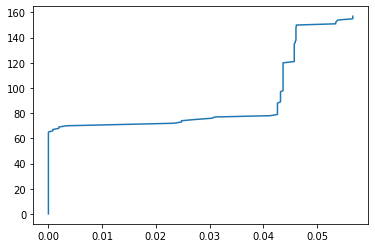

In [37]:
plt.plot(x, range(0, x.shape[0]))

In [42]:
from kneed import KneeLocator

In [43]:
kneedle = KneeLocator(x, range(0, x.shape[0]))

In [44]:
eps = kneedle.knee

In [45]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=eps, min_samples=1).fit(points)

In [80]:
labels = list(set(clustering.labels_))
len(labels)

127

In [64]:
import networkx as nx

In [130]:
weights = {}
for i in range(len(clustering.labels_) - 1):
    edge = (clustering.labels_[i], clustering.labels_[i + 1])
    weights[edge] = weights.get(edge, 0) + 1

In [151]:
edges = list((a, b, c) for (a, b), c in weights.items())
edges = sorted(edges, key=lambda x: x[2], reverse=True)
k = max(2, int(np.log(len(labels))))
edges = edges[:len(labels) * k]

In [165]:
G = nx.DiGraph()
G.add_nodes_from(labels)
G.add_weighted_edges_from(edges)

In [170]:
arc_weight = nx.get_edge_attributes(G, 'weight')
node_pos = nx.circular_layout(G)

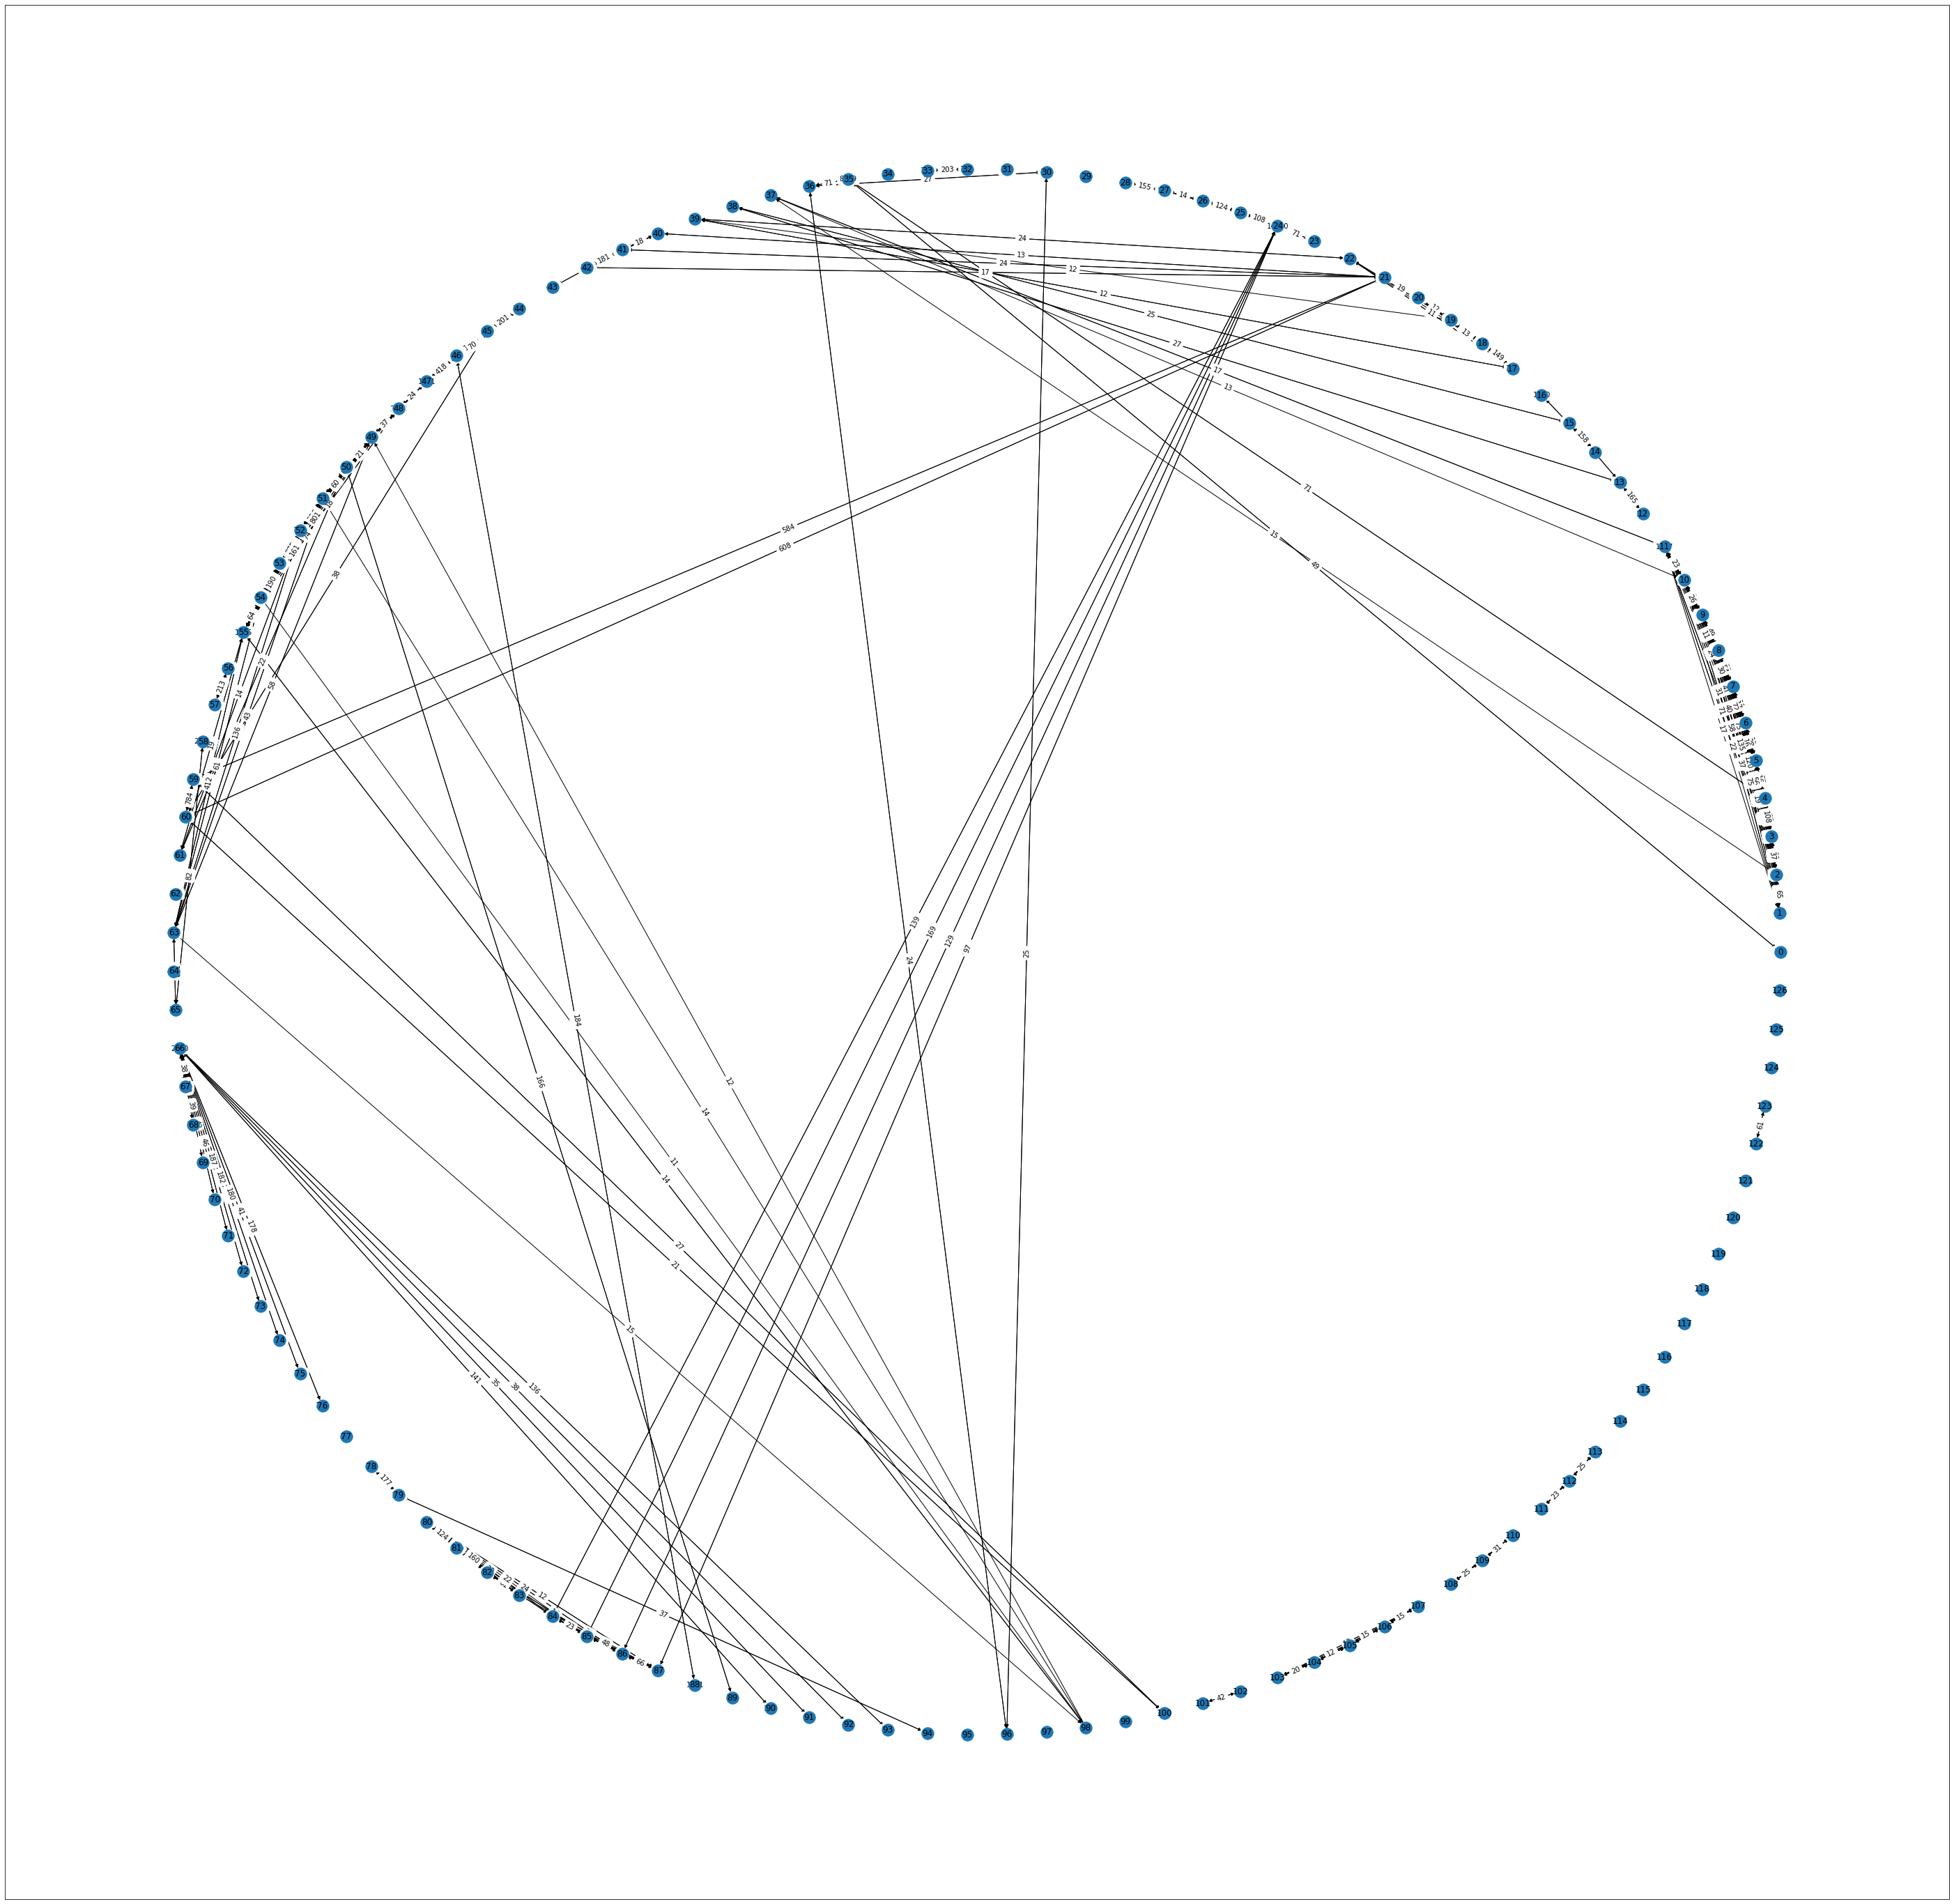

In [171]:
plt.figure(figsize=(50, 50))
nx.draw_networkx(G, node_pos)
_ = nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)